## Assignment 1 
### Samridhi Gupta  a1901641

### 1. All imports 

In [1]:
import json 
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #Importing Stop Words
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load libraries
import numpy as np
import spacy
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

import nltk
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samridhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samridhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samridhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samridhi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samridhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### 1.1 Reading Data

In [2]:
# Load the dataset
file_path = "random_30000_hotel_reviews.JSON"

# Read JSON lines into a list of dictionaries
with open(file_path, 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Concatenate 'title' and 'text' fields
df['text'] = df['title'] + ' ' + df['text']

# Split data into training, development, and test sets
train_df = df.iloc[:10000]
dev_df = df.iloc[10000:20000]
test_df = df.iloc[20000:]

# Extracting the overall_rating column from ratings
train_df['overall_rating'] = train_df['ratings'].apply(lambda x: x['overall'])
dev_df['overall_rating'] = dev_df['ratings'].apply(lambda x: x['overall'])
test_df['overall_rating'] = test_df['ratings'].apply(lambda x: x['overall'])

# Display each set
print("Training set length:", len(train_df))
print("Development set length:", len(dev_df))
print("Test set length:", len(test_df))

Training set length: 10000
Development set length: 10000
Test set length: 10000


### 1.2 Removing alphanumeric characters 

In [3]:
# removing alphanumeric characters from the 'text' column of all the three datasets
def clean_data(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

train_df['text'] = train_df['text'].apply(clean_data)
dev_df['text'] = dev_df['text'].apply(clean_data)
test_df['text'] = test_df['text'].apply(clean_data)

# Display the first few rows of each dataset to verify the preprocessing
print("Training set:")
print(train_df['text'].head())
print("\nDevelopment set:")
print(dev_df['text'].head())
print("\nTest set:")
print(test_df['text'].head())

Training set:
0    Horrible experience First of all we got there ...
1    Stay Away Found Racist graffiti in the room Re...
2    Great location and service Close to Union Squa...
3    I will never go back here again I had a bad vi...
4    Ripped off our VISA card after departure After...
Name: text, dtype: object

Development set:
10000    Nice hotel  great location This was a nice hot...
10001    Perfect location and the room was generous in ...
10002    Rude staff extra charges overall unimpressive ...
10003    Great location would stay here again Stayed he...
10004    Disappointed in Chicago I stayed at the Allert...
Name: text, dtype: object

Test set:
20000    Great Stay Comfortable Room Very Few Downsides...
20001    Nice Place It was a really nice hotel 2 BR2 Ba...
20002    Tip top Having been to New York on a number of...
20003    Great Locationrough sleep For the price and th...
20004    Compact but cool Midtown hotel Having read mai...
Name: text, dtype: object


### 2. Exploratory Data Analysis (EDA)

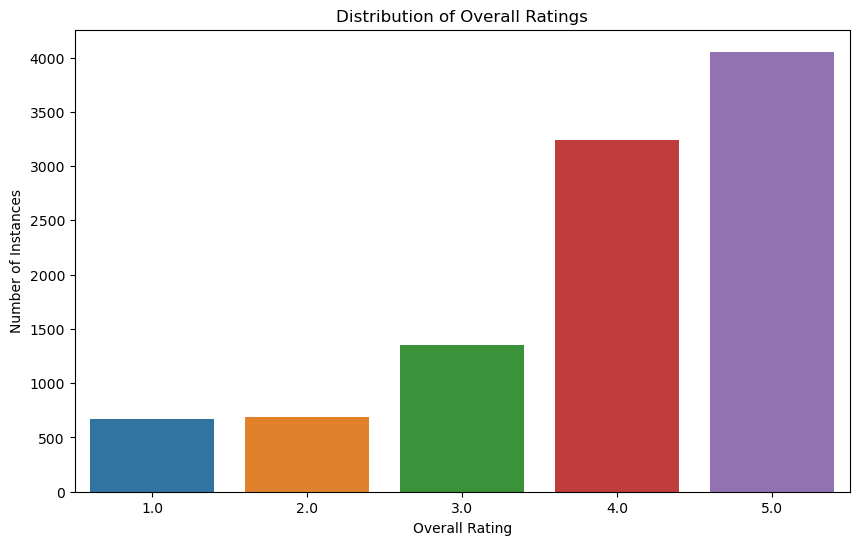

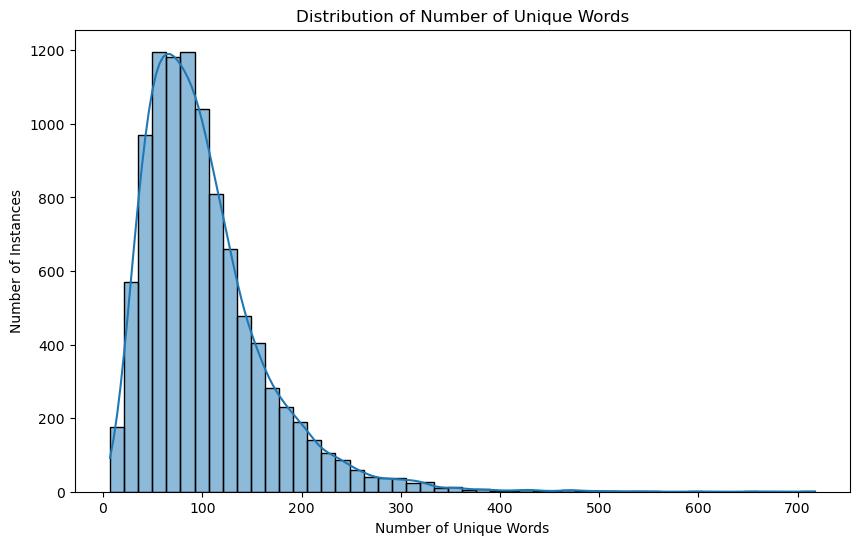

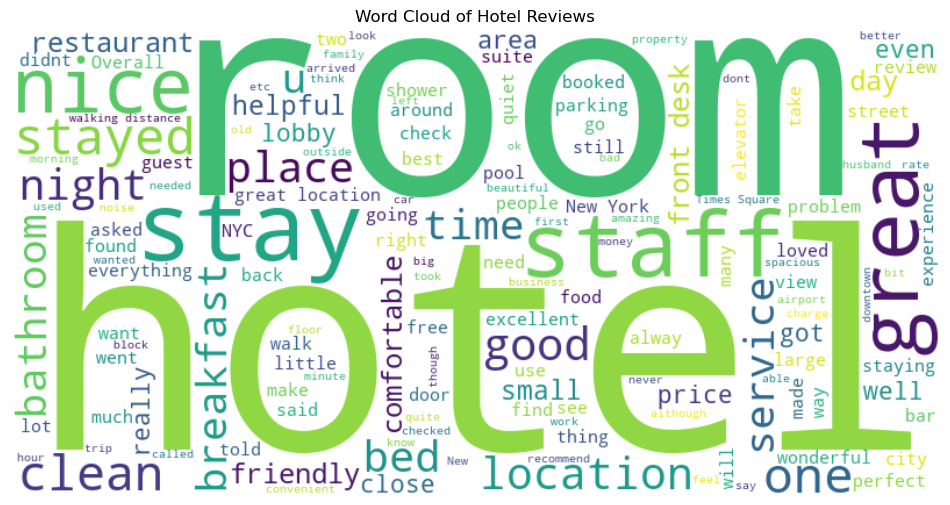

In [4]:
# Distribution of "overall" rating
plt.figure(figsize=(10, 6))
sns.countplot(x=dev_df['ratings'].apply(lambda x: x['overall']))  ## the overall score is nested inside 'ratings' dictionary under the key 'overall'. To extract the target variable, lambda function is applied.
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Instances')
plt.show()

# Number of unique words in the 'text' column
dev_df['unique_words'] = dev_df['text'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(10, 6))
sns.histplot(dev_df['unique_words'], bins=50, kde=True)
plt.title('Distribution of Number of Unique Words')
plt.xlabel('Number of Unique Words')
plt.ylabel('Number of Instances')
plt.show()

# Word cloud to visualize common words
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(dev_df['text']))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hotel Reviews')
plt.show()

#### We clearly observe that overall rating '5' dominates i.e. it is the majority class or most of the reviews in the dataset consist of an overall rating of the hotels as 5. There is an imbalance between the classes (overall rating). 

In [5]:
# counting words
all_words = ' '.join(dev_df['text']).lower().split()
word_counts = Counter(all_words)

# Sort the words by frequency
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Display the most common words
top_n = 10    
print(f"Top {top_n} most common words:")
for word, count in sorted_word_counts[:top_n]:
    print(f"{word}: {count}")

# Extract words and frequencies
words = [word for word, _ in sorted_word_counts[:top_n]]
frequencies = [count for _, count in sorted_word_counts[:top_n]]

Top 10 most common words:
the: 101637
and: 54856
a: 45814
to: 40495
was: 33737
i: 26419
in: 25646
we: 21546
of: 21387
hotel: 19981


### 2.2 Visualizing dependencies 

#### Below, I have plotted two charts. One is the Review date vs. Overall rating of the hotel and the other is the hotel Location vs. Overall rating.  

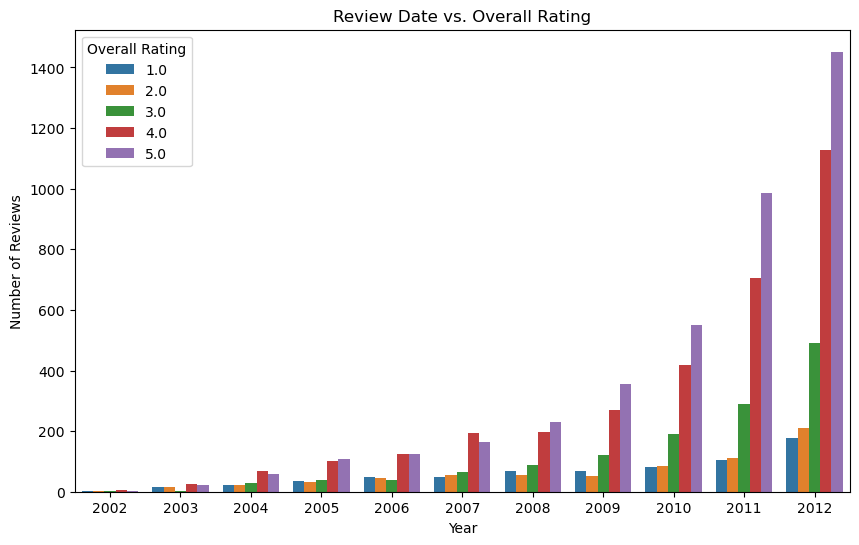

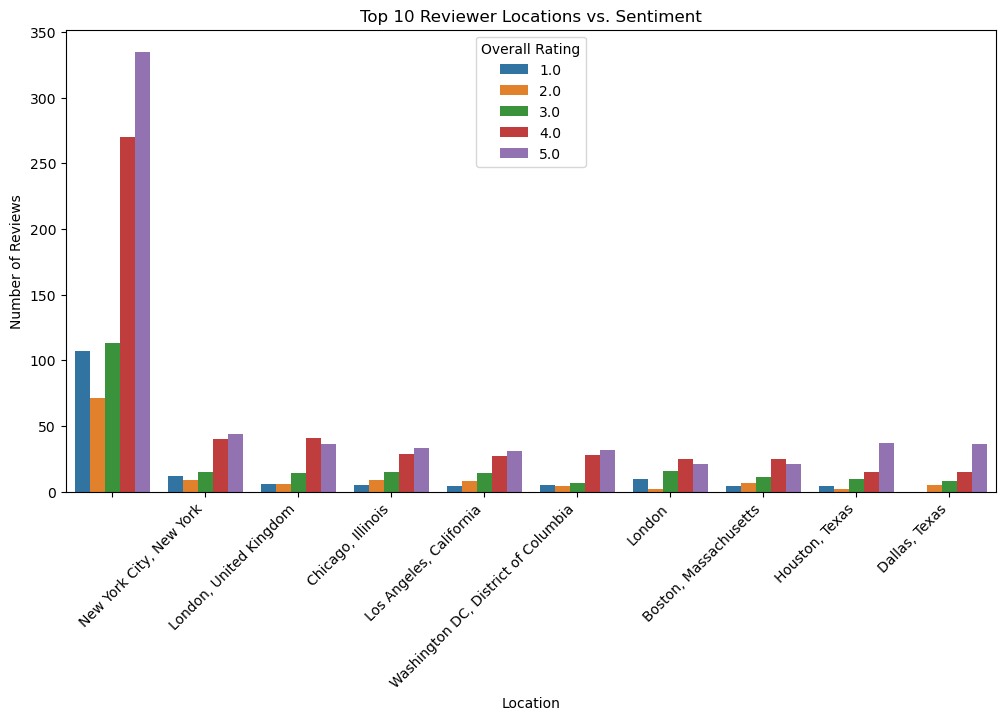

In [7]:
# 1. Review Date vs. Overall rating
# Convert 'date' column to datetime format
dev_df['date'] = pd.to_datetime(dev_df['date'])

# Plot Review Date vs. Overall rating 
plt.figure(figsize=(10, 6))
sns.countplot(x=dev_df['date'].dt.year, hue=dev_df['overall_rating'])
plt.title('Review Date vs. Overall Rating')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Overall Rating')
plt.show()


# 2. Reviewer Location vs. Overall Rating
plt.figure(figsize=(12, 6))
dev_df['location'] = dev_df['author'].apply(lambda x: x['location'])
sns.countplot(x='location', hue='overall_rating', data=dev_df, order=dev_df['location'].value_counts().index[:10])
plt.title('Top 10 Reviewer Locations vs. Sentiment')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Overall Rating')
plt.show()

#### Discussion:- Plotting these charts can provide valuable insights into the relationship between different variables and overall ratings in a dataset of reviews. Here's how each chart can be useful:

1. **Review Date vs. Overall Rating:**
   - This chart helps in understanding how overall ratings have evolved over time. It allows you to visualize trends in ratings, whether they have improved, deteriorated, or remained consistent over different years.
   - By observing the distribution of ratings across different years, we can identify any patterns or correlations between the time of review and the overall sentiment expressed in the reviews.
   - It enables us to assess if there are any seasonal variations or specific time periods associated with higher or lower ratings, which can be useful for business planning, marketing strategies, or understanding product performance over time.

2. **Reviewer Location vs. Overall Rating:**
   - This chart offers insights into how the geographical location of reviewers correlates with their sentiment towards the product or service being reviewed.
   - By visualizing the distribution of ratings across different reviewer locations, you can identify regions where the hotel service is well-received or poorly received.
   - It allows us to focus on specific geographic areas where sentiment might be particularly positive or negative, helping in targeted marketing campaigns, customer engagement strategies, or identifying areas for improvement.
   - Furthermore, by examining the top 10 reviewer locations, we can prioritize actions based on the most influential or populous regions, potentially maximizing the impact of any interventions or improvements.

Overall, these charts provide a visual representation of the data, making it easier to identify trends, patterns, and correlations, which can inform decision-making processes and strategic initiatives aimed at enhancing customer satisfaction and product quality.

### 3. Preprocessing

In [8]:
# tokenizing the 'text' column of all the datasets
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

dev_df['text_processed'] = dev_df['text'].apply(tokenize_text)
train_df['text_processed'] = train_df['text'].apply(tokenize_text)
test_df['text_processed'] = test_df['text'].apply(tokenize_text)

# Display the first few rows to verify the tokenizing
print(dev_df[['text', 'text_processed']].head())
print(train_df[['text', 'text_processed']].head())
print(test_df[['text', 'text_processed']].head())

                                                    text  \
10000  Nice hotel  great location This was a nice hot...   
10001  Perfect location and the room was generous in ...   
10002  Rude staff extra charges overall unimpressive ...   
10003  Great location would stay here again Stayed he...   
10004  Disappointed in Chicago I stayed at the Allert...   

                                          text_processed  
10000  [Nice, hotel, great, location, This, was, a, n...  
10001  [Perfect, location, and, the, room, was, gener...  
10002  [Rude, staff, extra, charges, overall, unimpre...  
10003  [Great, location, would, stay, here, again, St...  
10004  [Disappointed, in, Chicago, I, stayed, at, the...  
                                                text  \
0  Horrible experience First of all we got there ...   
1  Stay Away Found Racist graffiti in the room Re...   
2  Great location and service Close to Union Squa...   
3  I will never go back here again I had a bad vi...   
4  Ri

#### Tokenization is important because it:

1. Breaks text into smaller units for NLP tasks.
2. Extracts features for machine learning models.
3. Normalizes text for consistency.
4. Manages vocabulary for efficient processing.
5. Enhances computational efficiency.
6. Facilitates semantic understanding of text.

### 3.1 Upsampling train and development datasets 

##### Discussion:- Upsampling is a technique employed to augment the quantity of instances within a dataset, particularly useful in addressing imbalanced data distributions where certain classes are notably underrepresented. This process entails the creation of synthetic data points resembling those already present in the dataset, which are then appended to it.
Upsampling offers several benefits:

- It aids in mitigating imbalanced datasets by boosting the count of instances within the underrepresented class.
- It has the potential to enhance model performance by furnishing a larger pool of data for training.
- It presents a cost-effective solution as it does not necessitate additional data collection efforts.

However, there are drawbacks to consider:

- Overfitting risks emerge if the synthetic data points closely resemble the existing dataset.
- The computational demands and training duration of the model may escalate.
- The synthetic data quality might be subpar, leading to diminished model accuracy.

Although downsampling can also be useful for this dataset (given the number of reviews), after performing EDA I observed that upsampling would be a better approach as downsampling might lead to loss of information, especially in the minority classes. When given with an imbalanced dataset, upsampling could prove more advantageous for rectifying the issue. Downsampling, on the other hand, may lead to the omission of crucial information and might not effectively balance the distribution of classes.

In [10]:
# Upsampling train dataset 
# determine the desired size for each category
desired_size = train_df['overall_rating'].value_counts().max()

# Upsample each category to match the size
upsampled_datasets = []
for rating in train_df['overall_rating'].unique():
    category = train_df[train_df['overall_rating'] == rating]
    upsampled_category = resample(category, replace=True, n_samples=desired_size, random_state=42)
    upsampled_datasets.append(upsampled_category)

# Concatenate the upsampled datasets
train_upsampled = pd.concat(upsampled_datasets)

# Shuffle the upsampled dataset
train_upsampled = train_upsampled.sample(frac=1, random_state=42)

# Display the upsampled dataset
print("Upsampled train dataset:")
print(train_upsampled['overall_rating'].value_counts())

Upsampled train dataset:
4.0    4136
5.0    4136
2.0    4136
3.0    4136
1.0    4136
Name: overall_rating, dtype: int64


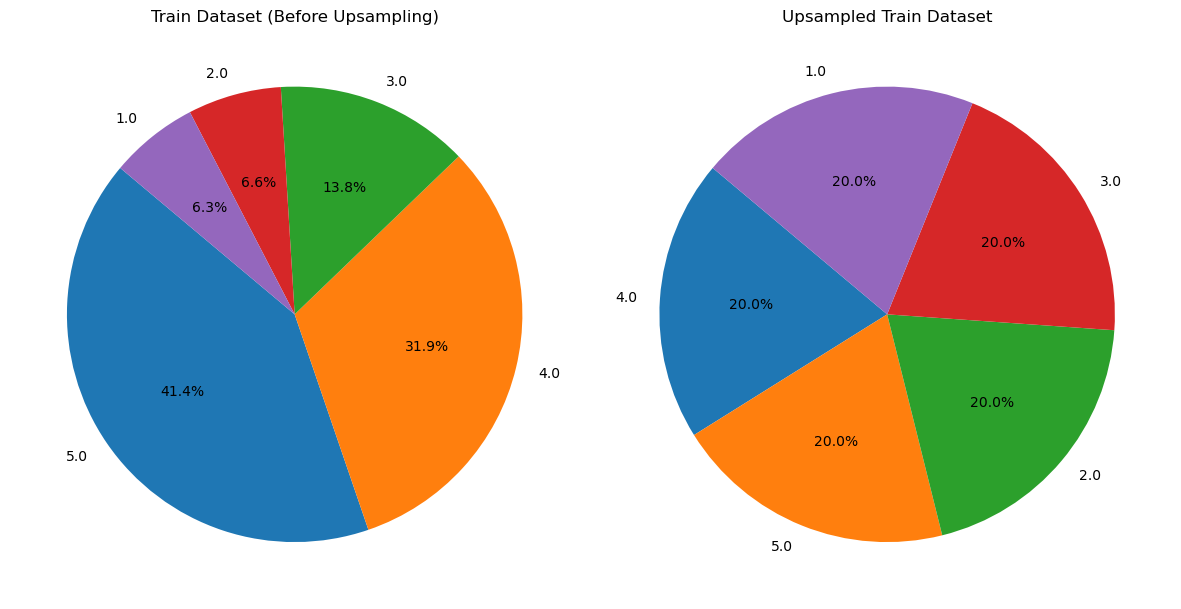

In [11]:
# plotting pie-charts to compare the distribution of reviews according to overall rating
# before and after upsampling 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_df['overall_rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Train Dataset (Before Upsampling)')
plt.ylabel('')

# Pie chart for the upsampled dataset
plt.subplot(1, 2, 2)
train_upsampled['overall_rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Upsampled Train Dataset')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [12]:
# upsampling the development dataset 
desired_size = dev_df['overall_rating'].value_counts().max()
upsampled_datasets_dev = []
for rating in dev_df['overall_rating'].unique():
    category = dev_df[dev_df['overall_rating'] == rating]
    upsampled_category = resample(category, replace=True, n_samples=desired_size, random_state=42)
    upsampled_datasets_dev.append(upsampled_category)
    
dev_upsampled = pd.concat(upsampled_datasets_dev)

# Shuffle the upsampled dataset
dev_upsampled = dev_upsampled.sample(frac=1, random_state=42)

print("Upsampled Dataset:")
print(dev_upsampled['overall_rating'].value_counts())

Upsampled Dataset:
5.0    4054
1.0    4054
2.0    4054
3.0    4054
4.0    4054
Name: overall_rating, dtype: int64


### 3.2 TF-IDF on development dataset 

In [13]:
# Performing TF-IDF on the 'text' column of development dataset
vectorizer = TfidfVectorizer()
corpus = [sentence for sentence in dev_df['text']]  
tf_idf_dev = vectorizer.fit_transform(corpus)   
print(tf_idf_dev.toarray())
vectorizer.get_feature_names_out()
tf_idf_dev.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(10000, 32705)

##### NOTE:- In a typical machine learning workflow, TF-IDF transformation is usually performed separately on the training, development, and test datasets. This ensures that the transformation is applied consistently across all datasets, preventing data leakage and ensuring fair evaluation of the model's performance.

### 4. Selecting supervised method for sentiment classification

For sentiment analysis specifically, the Multinomial Naive Bayes classifier and Random Forest Classifier are more commonly used and suitable due to their effectiveness with text data and ability to handle classification tasks. Linear Regression, on the other hand, is not typically used for sentiment analysis due to its limitations in handling categorical data and predicting discrete class labels. Therefore, between the options provided, the most suitable choices for sentiment analysis would be the Multinomial Naive Bayes classifier and the Random Forest Classifier.

Below, I have shown a comparison between the accuracy scores of the Multinomial Naive Bayes model and the Random Forest Classifier model. I have also included Linear Regression just to explain why it's not suitable for this task. The accuracy of regression models (like the linear regression) is usually calculated using the regression metrics like MSE, RMSE, R squared error and so on. Moreover, it is not feasible to use classification metrics (accuracy, F1 score, precision, recall) for linear regression. 

In [15]:
X_train = tf_idf_dev
Y_train = dev_df['overall_rating']
# training the ML models on dev dataset after TF-IDF, to show which one is the best

In [16]:
# Multinomial Naive Bayes model 
X_train_v1, X_test_v1, Y_train_v1, Y_test_v1 = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)
# Initialize and train the classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_v1, Y_train_v1)
# Make predictions on the training dataset
train_predictions = nb_classifier.predict(X_test_v1)
# Evaluate the model
train_accuracy = accuracy_score(Y_test_v1, train_predictions)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.418


In [17]:
# Random forest classifier 
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_v1, Y_train_v1)
train_predictions_rf = rf_classifier.predict(X_test_v1)
train_accuracy_rf = accuracy_score(Y_test_v1, train_predictions_rf)
print("Train Accuracy (Random Forest):", train_accuracy_rf)

Train Accuracy (Random Forest): 0.504


In [18]:
# Linear Regression (not suitable for this task)
linear_reg = LinearRegression()
linear_reg.fit(X_train_v1, Y_train_v1)
train_predictions_lr = linear_reg.predict(X_test_v1)

train_rmse_lr = mean_squared_error(Y_test_v1, train_predictions_lr, squared=False)
print("Train RMSE (Linear Regression):", train_rmse_lr)

Train RMSE (Linear Regression): 0.9481974767626421


As we can see from the above codes, Random Forest Classifier has the highest accuracy. Hence, I will be choosing random forest classifier as the machine learning model for this dataset. Additionally, I had also tested SVM, k-NN and MLP models and observed that these models took a really high computation time. Random forest classifier not only gives a decent accuracy score, but also boasts a short runtime.  

### 4.1 Text preprocessing and 10-fold cross validation

#### Discussion
I am choosing F1 score as the evaluation metric for all the experiments here after. The advantages of using F1-score over accuracy, recall and precision are as follows:-

1. **Comprehensive Evaluation**: The F1 score offers a holistic assessment of classifier performance by incorporating both precision and recall. It serves as a single metric that considers the trade-off between these two measures, particularly beneficial in scenarios with imbalanced datasets where one class predominates.

2. **Accounting for Class Imbalance**: Unlike accuracy, which may be misleading when dealing with class imbalance, the F1 score treats false positives and false negatives equally. This characteristic enhances its reliability for evaluating models trained on datasets with skewed class distributions.

3. **Focus on False positives and False negatives**: Precision and recall focus on distinct aspects of classification errors (false positives and false negatives, respectively). The F1 score strikes a balance between these error types, ensuring a comprehensive assessment of classifier performance.

4. **Applicability to Binary and Multiclass Problems**: The F1 score is versatile, applicable to both binary and multiclass classification tasks. 

In summary, the F1 score delivers a thorough evaluation of classification performance, considering precision and recall simultaneously. Its resilience to class imbalance and ability to offer a balanced assessment make it indispensable for evaluating classifier efficacy across various practical applications.

In [19]:
# performing 10-fold cross validation on development dataset
# this is without text preprocessing i.e. without lowercasing, removal of stop words and lemmatization
X = tf_idf_dev  # devlopment data after tf-idf
Y = dev_df['overall_rating']    
num_folds = 10
kf = KFold(n_splits=num_folds)
 
# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, Y, cv=10)

f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)
    # Predict on the test data
    y_pred = rf_classifier.predict(X_test)
    # Calculate evaluation metric
    f1 = f1_score(y_test, y_pred, average='micro')
    f1_scores.append(f1)

print("F1 Score:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))

F1 Score: [0.506, 0.507, 0.523, 0.533, 0.538, 0.522, 0.514, 0.519, 0.508, 0.483]
Mean F1 Score: 0.5153


1. **Lowercasing**:
   - Lowercasing involves converting all letters in a piece of text to lowercase.
   - It standardizes the text by ensuring that words are treated uniformly regardless of their original casing (e.g., "Hello" becomes "hello").
   - Lowercasing helps in reducing the vocabulary size and avoids duplication of words with different casings, thereby simplifying subsequent text analysis tasks.

2. **Removing Stop Words**:
   - Stop words are commonly used words (such as "the", "is", "and") that occur frequently in a language but often carry little or no meaningful information for text analysis tasks.
   - Removing stop words involves filtering out these common words from the text data.
   - By eliminating stop words, text processing becomes more focused on content-bearing words, which can improve the efficiency and effectiveness of downstream NLP tasks such as sentiment analysis, topic modeling, and document clustering.

3. **Lemmatization**:
   - Lemmatization is the process of reducing words to their base or root form, known as the lemma.
   - It aims to normalize words so that different inflected forms of the same word are treated as a single item.
   - For example, lemmatizing words like "running", "ran", and "runs" would result in their lemma "run".
   - Lemmatization helps in reducing the dimensionality of the vocabulary and improving the accuracy of text analysis tasks by ensuring that words with similar meanings are represented consistently.

#### 4.1.1 Lowercasing 

In [20]:
# performing lowercasing on the 'text' column of the upsampled development dataset 
dev_lowercase = dev_upsampled['text'].apply(lambda row: row.lower())

In [21]:
dev_lowercase

17262    wow what a delightful find beautifully appoint...
17602    bed bugs we arrived late night of august 13th ...
16895    hotel i would advise you not to stay at i rece...
18781    just ok the horton grand has potential but it ...
16679    business district i was attending a conference...
                               ...                        
16171    not a bad spot to stop we stayed for three nig...
18404    comfy but customer service needs some help nic...
13513    living in a box we are since yesterday in the ...
16751    i had no problems  clean and comfortable we st...
11302    inner harbor location location location fantas...
Name: text, Length: 20270, dtype: object

In [22]:
# TF_IDF on the development dataset after lowercasing
corpus_lower = [sentence for sentence in dev_lowercase]  
tf_idf_dev_lower = vectorizer.transform(corpus_lower)  
print(tf_idf_dev_lower.toarray())
vectorizer.get_feature_names_out()
tf_idf_dev_lower.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(20270, 32705)

In [23]:
variable_dev = pd.DataFrame(dev_upsampled['overall_rating']).reset_index(drop = True)
variable_dev

,overall_rating
0,5.0
1,1.0
2,1.0
3,2.0
4,3.0
...,...
20265,3.0
20266,3.0
20267,2.0
20268,4.0


In [24]:
# Performing 10-fold cross validation after lowercasing 
X = tf_idf_dev_lower  # devlopment data after tf-idf
Y = variable_dev #dev_df['overall_rating']
num_folds = 10
kf = KFold(n_splits=num_folds)
 
# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, Y, cv=10)

f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)
    # Predict on the test data
    y_pred = rf_classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    f1_scores.append(f1)

print("F1 Score:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))

F1 Score: [0.9403058707449433, 0.9279723729649728, 0.9442525900345338, 0.9388258510113469, 0.9358658115441539, 0.9393191909225457, 0.9378391711889492, 0.9393191909225457, 0.9452392698569314, 0.940799210656142]
Mean F1 Score: 0.9389738529847065


#### 4.1.2. Removing stop words

In [25]:
# removing stop words from the 'text' column of development dataset 
stop_words = set(stopwords.words('english'))
dev_filteredWords = dev_upsampled['text_processed'].apply(lambda words: [word for word in words if word.lower() not in stop_words])

In [26]:
dev_filteredWords

17262    [Wow, delightful, find, Beautifully, appointed...
17602    [bed, bugs, arrived, late, night, August, 13th...
16895    [Hotel, would, advise, stay, recentley, travel...
18781    [OK, Horton, Grand, potential, clearly, needs,...
16679    [Business, District, attending, conference, th...
                               ...                        
16171    [bad, spot, stop, stayed, three, nights, early...
18404    [Comfy, customer, service, needs, help, Nice, ...
13513    [Living, box, since, yesterday, Millenium, Bil...
16751    [PROBLEMS, CLEAN, COMFORTABLE, stayed, SAT, ni...
11302    [Inner, Harbor, Location, Location, Location, ...
Name: text_processed, Length: 20270, dtype: object

In [27]:
# TF-IDF on development dataset after removing stop words
dev_filteredWords = dev_filteredWords.apply(lambda row: " ".join(row))
corpus_stopWords = [sentence for sentence in dev_filteredWords]  
tf_idf_stopw = vectorizer.transform(corpus_stopWords)  
print(tf_idf_stopw.toarray())
vectorizer.get_feature_names_out()
tf_idf_stopw.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(20270, 32705)

In [28]:
# Performing 10-fold cross validation after removing stop words 
X = tf_idf_stopw 
Y = variable_dev 
num_folds = 10
kf = KFold(n_splits=num_folds)
 
# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, Y, cv=10)
f1_scores = []
 
# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)
    # Predict on the test data
    y_pred = rf_classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    f1_scores.append(f1)

print("F1 Score:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))

F1 Score: [0.9417858904785397, 0.9388258510113469, 0.9427725703009373, 0.9457326097681302, 0.9358658115441539, 0.9393191909225457, 0.9417858904785397, 0.9324124321657622, 0.9472126295017267, 0.940799210656142]
Mean F1 Score: 0.9406512086827824


#### 4.1.3 Lemmatization

In [29]:
# performing lemmatization on development dataset
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')
# Process the text using spaCy
doc = dev_upsampled['text'].apply(lambda text:nlp(text))
# Extract lemmatized tokens
lemmatized_tokens = doc.apply(lambda doc:[token.lemma_ for token in doc])
# Join the lemmatized tokens into a sentence
lemmatized_text = lemmatized_tokens.apply(lambda tokens:' '.join(tokens))
print("Lemmatized Text:", lemmatized_text)

# takes the longest time to run
# hence, not a sutiable preprocessing technique for this dataset

Lemmatized Text: 17262    wow what a delightful find beautifully appoint...
17602    bed bug we arrive late night of August 13th we...
16895    hotel I would advise you not to stay at I rece...
18781    just ok the Horton Grand have potential but it...
16679    Business District I be attend a conference the...
                               ...                        
16171    not a bad spot to stop we stay for three night...
18404    comfy but customer service need some help nice...
13513    live in a box we be since yesterday in the Mil...
16751    I have no problems   CLEAN and COMFORTABLE we ...
11302    Inner Harbor Location Location Location Fantas...
Name: text, Length: 20270, dtype: object


In [30]:
# TF-IDF on development dataset after lemmatization
lemmatized_text = lemmatized_text.apply(lambda row: " ".join(row))
corpus_lemma = [sentence for sentence in lemmatized_text]  
tfidf_dev_lemma = vectorizer.transform(corpus_lemma)  
print(tfidf_dev_lemma.toarray())
vectorizer.get_feature_names_out()
tfidf_dev_lemma.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(20270, 32705)

In [31]:
# performing 10-fold cross validation on lemmatized data
X = tfidf_dev_lemma 
Y = variable_dev 
num_folds = 10
kf = KFold(n_splits=num_folds)
 
# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, Y, cv=10)

f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)
    # Predict on the test data
    y_pred = rf_classifier.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    f1_scores.append(f1)

print("F1 Score:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))

F1 Score: [0.18944252590034533, 0.18944252590034533, 0.17513566847557968, 0.18450912678835718, 0.1914158855451406, 0.18549580661075482, 0.18450912678835718, 0.19240256536753825, 0.19240256536753825, 0.1909225456339418]
Mean F1 Score: 0.18756783423778986


#### Discussion
It is observed that the F1 score after removing stop words from the development dataset is the highest. Although, applying lowercase to the development dataset is also giving a high F1 score. The lowest score has been obtained after lemmatization. It was also observed that lemmatization took the longest time to run, whereas lowercasing and removing stop words were computationally effective. 

In addition to these observations, removing stop words can be beneficial in several ways. With a smaller vocabulary, computational tasks such as text processing and model training become more efficient, as there are fewer unique tokens to process. Furthermore, a smaller vocabulary requires less memory for storage, making it easier to handle and manipulate large volumes of text data.Removing stop words can lead to a more focused analysis by prioritizing content-bearing words. This can potentially improve the performance of text analysis models by reducing noise and increasing the relevance of features. Hence after experimenting with different text processing techniques, I decided to go ahead with removing stop words. 

### 5. Sentiment classification using VADER lexicon and method

In [68]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()
texts = dev_upsampled['text']

# Perform VADER analysis on each text
vader_scores = []
for text in texts:
    scores = sid.polarity_scores(text)
    vader_scores.append(scores)

# Convert the VADER scores into a DataFrame for easier analysis
vader_df = pd.DataFrame(vader_scores)

# Print the VADER scores DataFrame
print(vader_df)

         neg    neu    pos  compound
0      0.000  0.663  0.337    0.9848
1      0.164  0.785  0.051   -0.9862
2      0.051  0.885  0.064    0.4005
3      0.092  0.687  0.221    0.9769
4      0.017  0.945  0.038    0.4404
...      ...    ...    ...       ...
20265  0.037  0.812  0.151    0.9092
20266  0.058  0.746  0.196    0.9708
20267  0.047  0.840  0.113    0.8217
20268  0.061  0.792  0.147    0.9210
20269  0.000  0.658  0.342    0.9527

[20270 rows x 4 columns]


In [69]:
# mapping the compound values from VADER to the classes
# here, classes are from 1 to 5 (overall rating)
# Rating 1-2: negative
# Rating 3: neutral
# Rating 3-5: positive
# defining a method to map values 
def map_sentiment(compound):
    if compound <= -0.5:
        return 1  
    elif compound > -0.5 and compound <= 0:
        return 2
    elif compound > 0 and compound <= 0.3:
        return 3
    elif compound > 0.3 and compound <= 0.5:
        return 4
    else:
        return 5

vader_df['mapped_rating'] = vader_df['compound'].apply(map_sentiment)

# Print the DataFrame with mapped ratings
print(vader_df)

         neg    neu    pos  compound  mapped_rating
0      0.000  0.663  0.337    0.9848              5
1      0.164  0.785  0.051   -0.9862              1
2      0.051  0.885  0.064    0.4005              4
3      0.092  0.687  0.221    0.9769              5
4      0.017  0.945  0.038    0.4404              4
...      ...    ...    ...       ...            ...
20265  0.037  0.812  0.151    0.9092              5
20266  0.058  0.746  0.196    0.9708              5
20267  0.047  0.840  0.113    0.8217              5
20268  0.061  0.792  0.147    0.9210              5
20269  0.000  0.658  0.342    0.9527              5

[20270 rows x 5 columns]


In [70]:
actual_ratings = dev_upsampled['overall_rating']

# Calculate evaluation metrics
# accuracy = accuracy_score(actual_ratings, vader_df['mapped_rating'])
f1 = f1_score(actual_ratings, vader_df['mapped_rating'], average='micro')
# precision = precision_score(actual_ratings, vader_df['mapped_rating'], average='micro')
# recall = recall_score(actual_ratings, vader_df['mapped_rating'], average='micro')

# Print the evaluation metrics
print("F1 score:", f1)

F1 score: 0.3343857918105575


#### Discussion:
VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically designed for analyzing sentiment in social media texts. It uses a list of lexical features, including both unigrams and bigrams, along with a set of rules to determine the sentiment polarity of a given text. The sentiment polarity is measured on a scale of -1 to +1, where -1 represents extremely negative sentiment and +1 represents extremely positive sentiment.

The above code begins by initializing the VADER sentiment analyzer using the `SentimentIntensityAnalyzer()` function from the VADER library. The sentiment analysis is performed on each text in the dataset (`dev_upsampled['text']`) using a loop.
For each text, VADER calculates polarity scores, including positive, negative, neutral, and compound scores. The compound score represents the overall sentiment of the text.The polarity scores obtained from VADER are stored in a list (`vader_scores`) and then converted into a DataFrame (`vader_df`) for easier analysis using the Pandas library.The compound scores from VADER are then mapped to corresponding classes based on predefined thresholds.

Ratings are categorized into classes ranging from 1 to 5, where ratings 1-2 are considered negative, rating 3 is neutral, and ratings 3-5 are positive. After this, the VADER analysis is evaluated using the F1 score and we get a score of 0.334 or 33.43%, which is much lower than 0.94065 or 94.06% (the score obtained in 10-fold cross validation, after removing stop words). 

### 6. Combining VADER with the best classifier

In [36]:
dev_filteredWords

17262    Wow delightful find Beautifully appointed room...
17602    bed bugs arrived late night August 13th first ...
16895    Hotel would advise stay recentley traveled Sea...
18781    OK Horton Grand potential clearly needs renova...
16679    Business District attending conference therefo...
                               ...                        
16171    bad spot stop stayed three nights early Septem...
18404    Comfy customer service needs help Nice size ro...
13513    Living box since yesterday Millenium Biltmore ...
16751    PROBLEMS CLEAN COMFORTABLE stayed SAT nightABS...
11302    Inner Harbor Location Location Location Fantas...
Name: text_processed, Length: 20270, dtype: object

In [60]:
# combining stop words removal and VADER
sid = SentimentIntensityAnalyzer()
texts = dev_filteredWords
vader_scores = []
original_texts = []
for text in texts:
    scores = sid.polarity_scores(text)
    vader_scores.append(scores)
    original_texts.append(text) 
vader_df = pd.DataFrame(vader_scores)
vader_df['original_text'] = original_texts 
print(vader_df)

         neg    neu    pos  compound  \
0      0.000  0.489  0.511    0.9840   
1      0.217  0.701  0.082   -0.9633   
2      0.081  0.782  0.137    0.6597   
3      0.079  0.613  0.308    0.9753   
4      0.000  0.923  0.077    0.6249   
...      ...    ...    ...       ...   
20265  0.144  0.671  0.185    0.1689   
20266  0.075  0.672  0.253    0.9377   
20267  0.071  0.705  0.225    0.8857   
20268  0.037  0.729  0.235    0.9550   
20269  0.000  0.560  0.440    0.9403   

                                           original_text  
0      Wow delightful find Beautifully appointed room...  
1      bed bugs arrived late night August 13th first ...  
2      Hotel would advise stay recentley traveled Sea...  
3      OK Horton Grand potential clearly needs renova...  
4      Business District attending conference therefo...  
...                                                  ...  
20265  bad spot stop stayed three nights early Septem...  
20266  Comfy customer service needs help Nice s

In [38]:
def map_sentiment(compound):
    if compound <= -0.5:
        return 1  
    elif compound > -0.5 and compound <= 0:
        return 2
    elif compound > 0 and compound <= 0.3:
        return 3
    elif compound > 0.3 and compound <= 0.5:
        return 4
    else:
        return 5

vader_df['mapped_rating'] = vader_df['compound'].apply(map_sentiment)

# Print the DataFrame with mapped ratings
print(vader_df)

         neg    neu    pos  compound  mapped_rating
0      0.000  0.489  0.511    0.9840              5
1      0.217  0.701  0.082   -0.9633              1
2      0.081  0.782  0.137    0.6597              5
3      0.079  0.613  0.308    0.9753              5
4      0.000  0.923  0.077    0.6249              5
...      ...    ...    ...       ...            ...
20265  0.144  0.671  0.185    0.1689              3
20266  0.075  0.672  0.253    0.9377              5
20267  0.071  0.705  0.225    0.8857              5
20268  0.037  0.729  0.235    0.9550              5
20269  0.000  0.560  0.440    0.9403              5

[20270 rows x 5 columns]


In [39]:
actual_ratings = dev_upsampled['overall_rating']

# Calculate evaluation metrics
accuracy = accuracy_score(actual_ratings, vader_df['mapped_rating'])
f1 = f1_score(actual_ratings, vader_df['mapped_rating'], average='micro')
precision = precision_score(actual_ratings, vader_df['mapped_rating'], average='micro')
recall = recall_score(actual_ratings, vader_df['mapped_rating'], average='micro')

# Print the evaluation metrics
print("Recall:", recall)

Recall: 0.3040453872718303


In [66]:
import scipy.sparse

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Compute VADER compound scores for each text in the dataset
vader_scores = []
for text in dev_filteredWords:
    scores = sid.polarity_scores(text)
    vader_scores.append(scores['compound'])

# Add VADER compound scores as a new column to your DataFrame
dev_upsampled['compound_score'] = vader_scores

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dev_upsampled[['text', 'compound_score']], dev_upsampled['overall_rating'], test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

# Combine TF-IDF features with VADER compound scores
X_train_combined = scipy.sparse.hstack((X_train_tfidf, np.array(X_train['compound_score'])[:, None]))
X_test_combined = scipy.sparse.hstack((X_test_tfidf, np.array(X_test['compound_score'])[:, None]))

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_combined, y_train)

# Predict sentiment
y_pred = rf_classifier.predict(X_test_combined)

# Evaluate model
f1 = f1_score(y_test, y_pred, average='None')
print("F1 score:", f1)

ValueError: average has to be one of (None, 'micro', 'macro', 'weighted', 'samples')

#### Reference:- https://jackmckew.dev/sentiment-analysis-text-cleaning-in-python-with-vader.html
https://github.com/agushendra7/twitter-sentiment-analysis-using-vader-and-random-forest
https://datascience.stackexchange.com/questions/22273/combining-machine-learning-classifier-with-nltk-vader-for-sentiment-analysis

### 7. Training and testing the final method

#### Note:- My best methods by far is the Random Forest Classifier. I got the best result on the development dataset after removing stop words form the 'text' column. Hence, I will be training and testing data further on the Random Forest Classifier model. 

In [41]:
# removing stopwords from train data
stop_words = set(stopwords.words('english'))
train_filteredWords = train_upsampled['text_processed'].apply(lambda words: [word for word in words if word.lower() not in stop_words])

In [42]:
# TF-IDF on train data
train_filteredWords = train_filteredWords.apply(lambda row: " ".join(row))
corpus_train = [sentence for sentence in train_filteredWords]  
train_final = vectorizer.fit_transform(corpus_train)  
print(train_final.toarray())
vectorizer.get_feature_names_out()
train_final.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(20680, 28476)

In [54]:
X = train_final  # train data after tf-idf
Y = train_upsampled['overall_rating'] 
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, Y)

RandomForestClassifier(random_state=42)

### 7.1 Testing 


In [44]:
# removing stop words form the test data
stop_words = set(stopwords.words('english'))
test_filteredWords = test_df['text'].apply(lambda words: [word for word in words if word.lower() not in stop_words])

In [45]:
# TF-IDF on test data
test_filteredWords = test_filteredWords.apply(lambda row: " ".join(row))
corpus_test = [sentence for sentence in test_filteredWords]  
test_final = vectorizer.transform(corpus_test)  
print(test_final.toarray())
vectorizer.get_feature_names_out()
test_final.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(10000, 28476)

In [55]:
X = test_final
Y = test_df['overall_rating']
y_pred = rf_classifier.predict(X)
f1 = f1_score(Y, y_pred, average='micro')
print("F1 score:", f1)

F1 score: 0.4103


#### Discussion:- 
The results obtained after validating development dataset on Random Forest classifier was much higher. We obtained an F1 score of 94% after performing 10-fold cross validation on dev dataset, whereas test data has fetched us only 41% of accuracy. This might be possible because the development dataset was upsampled. Upsampling at times leads to overfitting. I went ahead with removal of stop words for both the train and test datasets as this technique worked the best. After removing stop words, I performed TF-IDF on both train and test and fed this as input to the random forest classifier.  

### 8. Reviews aspect prediction

To predict ratings for various hotel aspects (such as service, cleanliness, overall experience, value, location, and sleep quality) based on review titles and text, the following approach can be adopted:

1. **Data Preparation**:
   - Cleanse the text data by eliminating punctuation, special characters, and irrelevant content.
   - Segment the text into words or subwords.
   - Implement text normalization techniques like lowercasing, stop word removal, and lemmatization to standardize the text and minimize noise.

2. **Feature Engineering**:
   - Utilize methods like TF-IDF or word embeddings (e.g., Word2Vec, GloVe) to convert the text data into numerical representations.
   - Combine the features extracted from both the review title and text to construct a feature matrix for modeling purposes.

3. **Model Selection**:
   - Opt for suitable machine learning models for multi-label classification, treating each aspect rating as a distinct classification task.
   - Consider models such as logistic regression, random forest classifier, or neural networks.
   - Alternatively, explore ensemble techniques or deep learning architectures for enhanced predictive performance.

4. **Model Training**:
   - Segment the dataset into training and testing subsets.
   - Train separate models for each aspect rating using the extracted features and corresponding ratings.
   - Fine-tune model hyperparameters through cross-validation to optimize performance.

5. **Evaluation**:
   - Assess the trained models' effectiveness using pertinent evaluation metrics like accuracy, precision, recall, F1-score, or mean squared error (depending on the specific objective).
   - Analyze model performance and identify potential areas for enhancement.

6. **Deployment**:
   - Deploy the trained models to forecast aspect ratings for new reviews.
   - Integrate the prediction pipeline into the hotel review platform or system to facilitate real-time feedback analysis.

Experimenting with diverse preprocessing methods, feature representations, and modeling strategies is crucial to identifying the most effective approach for predicting aspect ratings from review text. Additionally, incorporating domain expertise and feedback from domain specialists can further refine the predictive capabilities of the models.

### 9. References

#### https://www.geeksforgeeks.org/make_pipeline-function-in-sklearn/
#### https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=Feature%20scaling%20is%20a%20data,of%20features%20with%20larger%20values.
#### https://www.v7labs.com/blog/train-validation-test-set#:~:text=Don't%20use%20the%20same,%2C%20validation%2C%20and%20test%20sets.
#### https://neptune.ai/blog/ml-model-evaluation-and-selection#:~:text=It%20is%20done%20by%20calculating,with%20the%20machine%20learning%20solution.
#### https://www.analyticsvidhya.com/blog/2021/09/creating-a-movie-reviews-classifier-using-tf-idf-in-python/
#### https://medium.com/@rithpansanga/choosing-the-right-size-a-look-at-the-differences-between-upsampling-and-downsampling-methods-daae83915c19
#### https://www.v7labs.com/blog/train-validation-test-set#:~:text=Don't%20use%20the%20same,%2C%20validation%2C%20and%20test%20sets.
#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
#### https://towardsdatascience.com/text-preprocessing-in-natural-language-processing-using-python-6113ff5decd8
#### https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/#:~:text=The%20fit()%20method%20helps,()%20methods%20in%20one%20step.
#### https://medium.com/@rithpansanga/choosing-the-right-size-a-look-at-the-differences-between-upsampling-and-downsampling-methods-daae83915c19#:~:text=One%20approach%20to%20upsampling%20is,and%20can%20lead%20to%20overfitting.